In [38]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import PIL
from PIL import Image
import streamlit as st
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Data preprocessing

In [71]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   horizontal_flip=True,
                                   zoom_range = 0.3)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [72]:
training_images = train_data_gen.flow_from_directory(
    r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Training',
    batch_size = 32,
    target_size = (100,100),
    class_mode = 'categorical'
)

Found 70491 images belonging to 141 classes.


In [73]:
testing_images = test_data_gen.flow_from_directory(
    r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Test',
    batch_size = 32,
    target_size = (100,100),
    class_mode = 'categorical'
)

Found 23619 images belonging to 141 classes.


# Visualizing top 10 fruit classes with images in them

In [74]:
classes = [
    'Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2',
    'Apple Golden 3', 'Apple Granny Smith 1', 'Apple hit 1', 'Apple Pink Lady 1', 'Apple Red 1',
    'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
    'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1',
    'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2',
    'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1',
    'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1',
    'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2',
    'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1',
    'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink 1',
    'Grapefruit White 1', 'Guava 1', 'Hazelnut 1', 'Huckleberry 1', 'Kaki 1', 'Kiwi 1', 'Kohlrabi 1',
    'Kumquats 1', 'Lemon 1', 'Lemon Meyer 1', 'Limes 1', 'Lychee 1', 'Mandarine 1', 'Mango 1',
    'Mango Red 1', 'Mangostan 1', 'Maracuja 1', 'Melon Piel de Sapo 1', 'Mulberry 1', 'Nectarine 1',
    'Nectarine Flat 1', 'Nut Forest 1', 'Nut Pecan 1', 'Onion Red 1', 'Onion Red Peeled 1',
    'Onion White 1', 'Orange 1', 'Papaya 1', 'Passion Fruit 1', 'Peach 1', 'Peach 2', 'Peach Flat 1',
    'Pear 1', 'Pear 2', 'Pear 3', 'Pear Abate 1', 'Pear Forelle 1', 'Pear Kaiser 1', 'Pear Monster 1',
    'Pear Red 1', 'Pear Stone 1', 'Pear Williams 1', 'Pepino 1', 'Pepper Green 1', 'Pepper Orange 1',
    'Pepper Red 1', 'Pepper Yellow 1', 'Physalis 1', 'Physalis with Husk 1', 'Pineapple 1',
    'Pineapple Mini 1', 'Pitahaya Red 1', 'Plum 1', 'Plum 2', 'Plum 3', 'Pomegranate 1', 'Pomelo Sweetie 1',
    'Potato Red 1', 'Potato Red Washed 1', 'Potato Sweet 1', 'Potato White 1', 'Quince 1', 'Rambutan 1',
    'Raspberry 1', 'Redcurrant 1', 'Salak 1', 'Strawberry 1', 'Strawberry Wedge 1', 'Tamarillo 1',
    'Tangelo 1', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red 1',
    'Tomato Heart 1', 'Tomato Maroon 1', 'Tomato not Ripened 1', 'Tomato Yellow 1', 'Walnut 1',
    'Watermelon 1', 'Zucchini 1', 'Zucchini dark 1'
]

In [75]:
train_dir = r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Training'
test_dir = r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Test'

fruits = []
images = []

for i in os.listdir(train_dir):
    # Join the directory path correctly
    subdir = os.path.join(train_dir, i)
    
    if os.path.isdir(subdir):  # Check if it is a directory
        for image_filename in os.listdir(subdir):
            fruits.append(i)
            images.append(os.path.join(i, image_filename))  

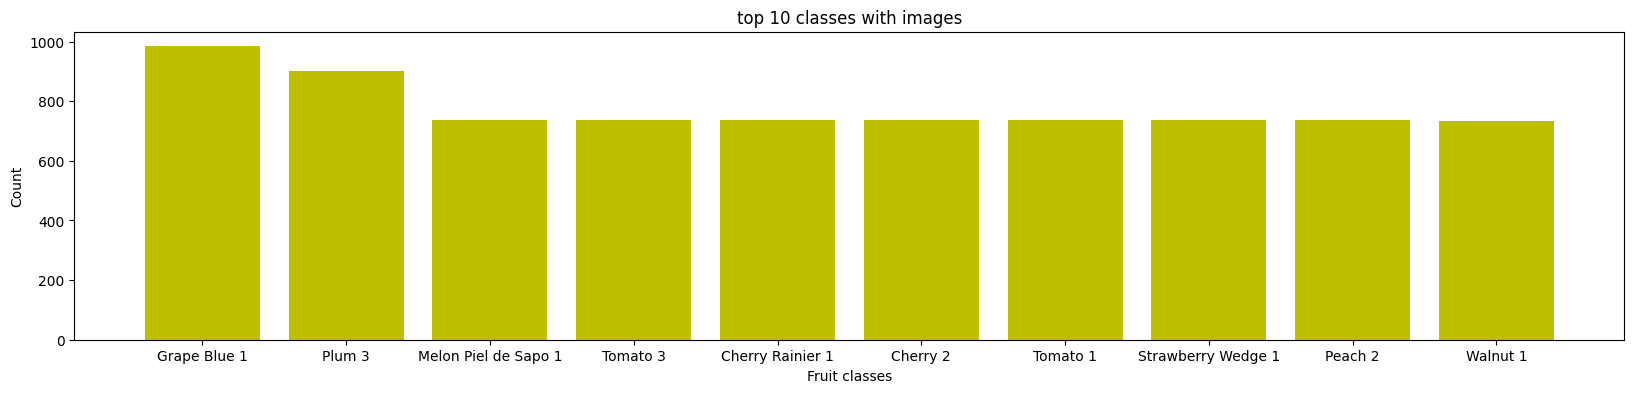

In [76]:
# create a dataframe 
data = pd.DataFrame(
    {"fruits_class":fruits,
    "image_path":images}
)
# extract top 10 classes 
top_10_classes = data.fruits_class.value_counts().head(10)

# plot the classes
plt.figure(figsize=(20,4))
plt.bar(top_10_classes.index, top_10_classes.values, color='y')
plt.xlabel('Fruit classes')
plt.ylabel('Count')
plt.title('top 10 classes with images')
plt.show()

# Showcasing a sample of photos

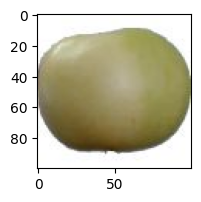

In [77]:
img_path = r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Training\Apple 6\r0_0_100.jpg'

plt.figure(figsize=(2,2))
image = mpimg.imread(img_path)
plt.imshow(image)

# Creating the model

In [78]:
data['fruits_class'].nunique()

141

In [79]:
model = models.Sequential()
# first conv layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(layers.MaxPool2D(2,2))
# second conv layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
# third conv layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
# flatten layer
model.add(layers.Flatten())

# Fully connectes layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(data['fruits_class'].nunique(), activation='softmax'))

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          36,237 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,703,533 (6.50 MB)

 Trainable params: 1,703,533 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    optimizer ='adam',
    loss ='categorical_crossentropy',
    metrics = ['accuracy']
)

In [82]:
history = model.fit(training_images,
         validation_data = testing_images,
         epochs=50,
         steps_per_epoch = 1600 // 32,
         validation_steps = 800 // 32,
                   verbose = 2)

Epoch 1/50
50/50 - 25s - 499ms/step - accuracy: 0.0162 - loss: 4.9340 - val_accuracy: 0.0200 - val_loss: 4.7952
Epoch 2/50
50/50 - 18s - 366ms/step - accuracy: 0.0388 - loss: 4.5533 - val_accuracy: 0.0600 - val_loss: 4.1685
Epoch 3/50
50/50 - 17s - 332ms/step - accuracy: 0.0831 - loss: 4.0232 - val_accuracy: 0.1675 - val_loss: 3.5756
Epoch 4/50
50/50 - 16s - 313ms/step - accuracy: 0.1194 - loss: 3.6324 - val_accuracy: 0.2738 - val_loss: 2.9526
Epoch 5/50
50/50 - 15s - 293ms/step - accuracy: 0.1688 - loss: 3.1773 - val_accuracy: 0.3988 - val_loss: 2.4273
Epoch 6/50
50/50 - 16s - 314ms/step - accuracy: 0.2275 - loss: 2.8902 - val_accuracy: 0.4263 - val_loss: 2.1062
Epoch 7/50
50/50 - 15s - 296ms/step - accuracy: 0.3006 - loss: 2.4828 - val_accuracy: 0.5625 - val_loss: 1.7442
Epoch 8/50
50/50 - 16s - 316ms/step - accuracy: 0.3675 - loss: 2.2283 - val_accuracy: 0.6350 - val_loss: 1.4860
Epoch 9/50
50/50 - 15s - 306ms/step - accuracy: 0.4000 - loss: 1.9885 - val_accuracy: 0.6837 - val_loss:

# Visualtiong Accuracy and Loss

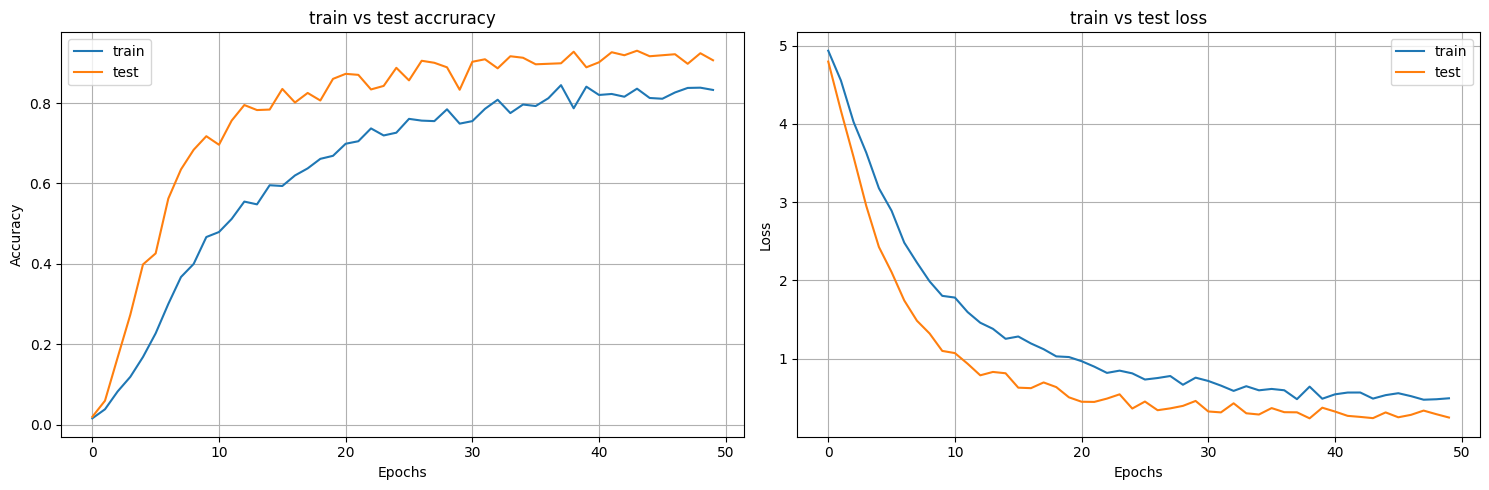

In [83]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['accuracy'], label='train')
ax[0].plot(history.history['val_accuracy'], label='test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('train vs test accruracy')
ax[0].legend()
ax[0].grid()

ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('train vs test loss')
ax[1].legend()
ax[1].grid()

plt.tight_layout()

# Predicting a single image

In [86]:
from tensorflow.keras.preprocessing import image
test_image_2 = image.load_img(r'C:\Users\ZBOOK\Desktop\Fruit\fruits-360_dataset_100x100\fruits-360\Test\Banana Red 1\5_100.jpg', target_size = (100, 100))
test_image_2 = image.img_to_array(test_image_2)
test_image_2 = np.expand_dims(test_image_2, axis = 0)
result_2 = model.predict(test_image_2)
index = np.argmax(result_2)
print(f'prediction is {classes[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
prediction is Banana Red 1


In [88]:
model.save('Fruit_image_class_CNN.keras')

In [ ]:
%%writefile main.py

import os
from PIL import Image
import numpy as np
import tensorflow as tf
import streamlit as st

import sys
sys.stdout.reconfigure(encoding='utf-8')

# Set UTF-8 encoding
os.environ['PYTHONIOENCODING'] = 'UTF-8'

# Define the working directory and paths
base_dir = os.path.dirname(__file__)
model_path = os.path.join(base_dir, 'Fruit_image_class_CNN.h5')
# Load the pre-trained model
model = tf.keras.models.load_model(model_path)

# Define class names directly
classes = [
    'Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2',
    'Apple Golden 3', 'Apple Granny Smith 1', 'Apple hit 1', 'Apple Pink Lady 1', 'Apple Red 1',
    'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
    'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1',
    'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2',
    'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1',
    'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1',
    'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2',
    'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1',
    'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink 1',
    'Grapefruit White 1', 'Guava 1', 'Hazelnut 1', 'Huckleberry 1', 'Kaki 1', 'Kiwi 1', 'Kohlrabi 1',
    'Kumquats 1', 'Lemon 1', 'Lemon Meyer 1', 'Limes 1', 'Lychee 1', 'Mandarine 1', 'Mango 1',
    'Mango Red 1', 'Mangostan 1', 'Maracuja 1', 'Melon Piel de Sapo 1', 'Mulberry 1', 'Nectarine 1',
    'Nectarine Flat 1', 'Nut Forest 1', 'Nut Pecan 1', 'Onion Red 1', 'Onion Red Peeled 1',
    'Onion White 1', 'Orange 1', 'Papaya 1', 'Passion Fruit 1', 'Peach 1', 'Peach 2', 'Peach Flat 1',
    'Pear 1', 'Pear 2', 'Pear 3', 'Pear Abate 1', 'Pear Forelle 1', 'Pear Kaiser 1', 'Pear Monster 1',
    'Pear Red 1', 'Pear Stone 1', 'Pear Williams 1', 'Pepino 1', 'Pepper Green 1', 'Pepper Orange 1',
    'Pepper Red 1', 'Pepper Yellow 1', 'Physalis 1', 'Physalis with Husk 1', 'Pineapple 1',
    'Pineapple Mini 1', 'Pitahaya Red 1', 'Plum 1', 'Plum 2', 'Plum 3', 'Pomegranate 1', 'Pomelo Sweetie 1',
    'Potato Red 1', 'Potato Red Washed 1', 'Potato Sweet 1', 'Potato White 1', 'Quince 1', 'Rambutan 1',
    'Raspberry 1', 'Redcurrant 1', 'Salak 1', 'Strawberry 1', 'Strawberry Wedge 1', 'Tamarillo 1',
    'Tangelo 1', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red 1',
    'Tomato Heart 1', 'Tomato Maroon 1', 'Tomato not Ripened 1', 'Tomato Yellow 1', 'Walnut 1',
    'Watermelon 1', 'Zucchini 1', 'Zucchini dark 1'
]

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image, target_size=(100, 100)):
    img = Image.open(image)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image, classes):
    preprocessed_img = load_and_preprocess_image(image)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = classes[predicted_class_index]
    return predicted_class_name

# Streamlit App
# image upload 
image_path = os.path.join(base_dir, 'orange-fruit-logo-vector-illustration-template_395528-original.png')

st. image(image_path, width = 300)

st.title('Fruit Image Classifier')

uploaded_image = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    image = Image.open(uploaded_image)
    col1, col2 = st.columns(2)

    with col1:
        resized_img = image.resize((150, 150))
        st.image(resized_img)

    with col2:
        if st.button('Classify'):
            prediction = predict_image_class(model, uploaded_image, classes)
            st.success(f'Prediction: {prediction}')

In [ ]:
!streamlit run C:\Users\ZBOOK\Desktop\Fruit\main.py

t=2024-08-28T00:09:11+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=5f47d60777fe clientid=b9f7b49823dfc30b4f631f942f4cc957
t=2024-08-28T00:09:11+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=850729436fa3 err="session closed"
t=2024-08-28T00:09:16+0100 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
